<a href="https://colab.research.google.com/github/faiyazabdullah/ML-Research/blob/main/Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# **Data Preprocessing**

In [ ]:
# Load breast cancer dataset from scikit-learn
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data Presentation**

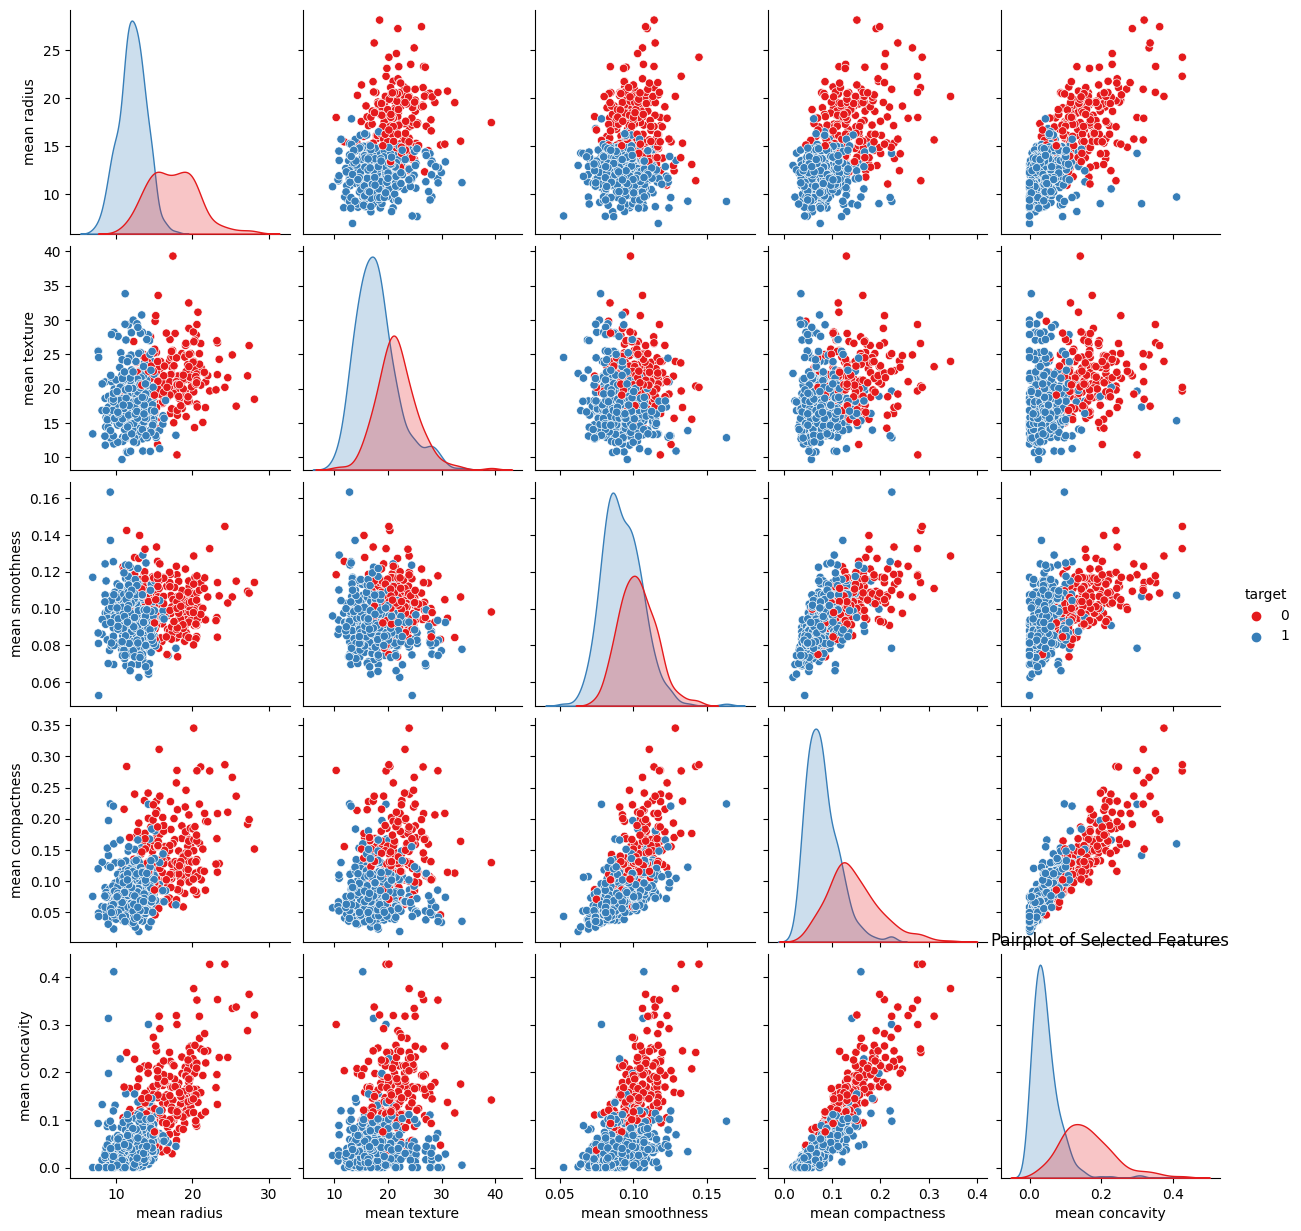

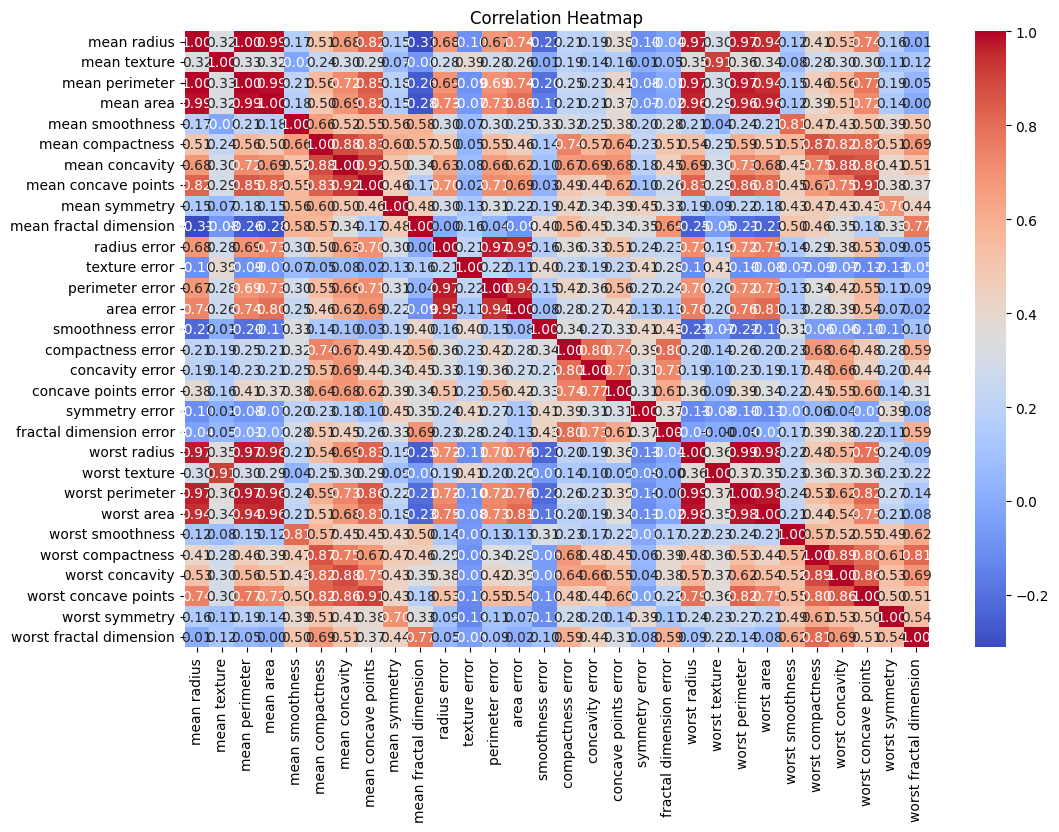

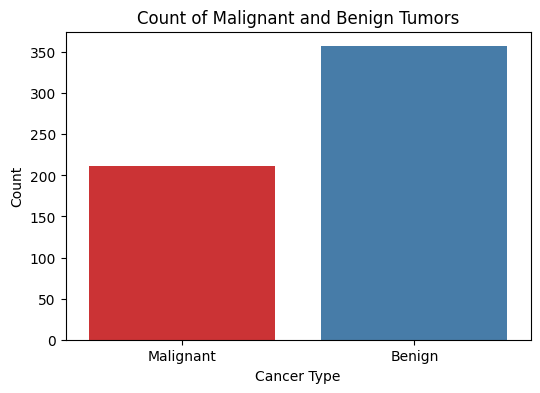

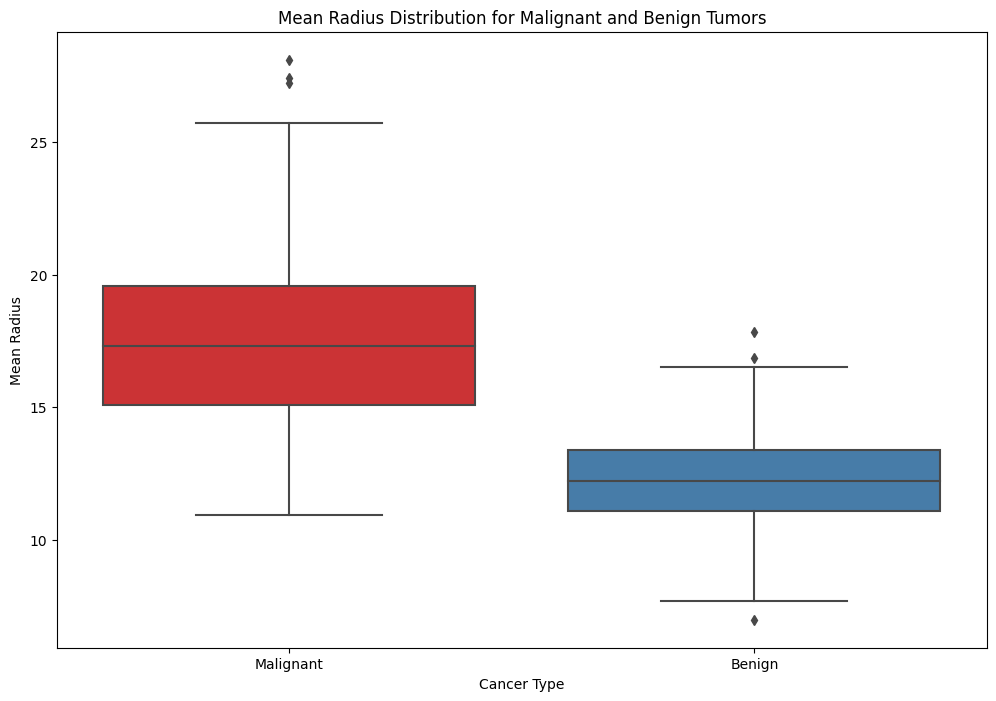

In [ ]:
feature_names = data.feature_names

# Create a DataFrame for visualization
df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y  # Add target column

# Pairplot for some selected features
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity']
sns.pairplot(df[selected_features + ['target']], hue='target', palette='Set1')
plt.title("Pairplot of Selected Features")
plt.show()

# Heatmap to show correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df[feature_names].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Countplot for target classes
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set1')
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Count of Malignant and Benign Tumors')
plt.show()

# Boxplot for individual features
plt.figure(figsize=(12, 8))
sns.boxplot(x='target', y='mean radius', data=df, palette='Set1')
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.xlabel('Cancer Type')
plt.ylabel('Mean Radius')
plt.title('Mean Radius Distribution for Malignant and Benign Tumors')
plt.show()

# **On Raw Data**

In [ ]:
# Naive Bayes Classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Ensemble Learning with Naive Bayes, Decision Tree, and Random Forest
weight_naive_bayes = 0.3
weight_decision_tree = 0.3
weight_random_forest = 0.4

# Predictions from individual classifiers
naive_bayes_predictions = naive_bayes_classifier.predict(X_test)
decision_tree_predictions = decision_tree_classifier.predict(X_test)
random_forest_predictions = random_forest_classifier.predict(X_test)

# Combine predictions using weighted averaging for ensemble
ensemble_predictions = (weight_naive_bayes * naive_bayes_predictions +
                        weight_decision_tree * decision_tree_predictions +
                        weight_random_forest * random_forest_predictions)

# Round the continuous predictions to obtain discrete class labels
rounded_ensemble_predictions = np.round(ensemble_predictions).astype(int)

# Calculate accuracy for individual classifiers
accuracy_nb = accuracy_score(y_test, naive_bayes_predictions)
accuracy_dt = accuracy_score(y_test, decision_tree_predictions)
accuracy_rf = accuracy_score(y_test, random_forest_predictions)

# Calculate accuracy for the ensemble model
accuracy_ensemble = accuracy_score(y_test, rounded_ensemble_predictions)

print("Naive Bayes Test Accuracy:", accuracy_nb)
print("Decision Tree Test Accuracy:", accuracy_dt)
print("Random Forest Test Accuracy:", accuracy_rf)
print("Ensemble Test Accuracy:", accuracy_ensemble)

Naive Bayes Test Accuracy: 0.9385964912280702
Decision Tree Test Accuracy: 0.9473684210526315
Random Forest Test Accuracy: 0.9649122807017544
Ensemble Test Accuracy: 0.9649122807017544


# **Train Naive Bayes Classifier**

In [ ]:
# Train Naive Bayes classifier on the features
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Get Naive Bayes probabilities for both training and test data
naive_bayes_train_probabilities = naive_bayes_classifier.predict_proba(X_train)
naive_bayes_test_probabilities = naive_bayes_classifier.predict_proba(X_test)

# **Extract Naive Bayes Probabilities and Integrate with Features**

In [ ]:
# Combine Naive Bayes probabilities with the original features for training and test data
X_train_enriched = np.hstack((X_train, naive_bayes_train_probabilities))
X_test_enriched = np.hstack((X_test, naive_bayes_test_probabilities))

# **Naive Bayes Classifier on the enriched dataset for breast cancer data**

In [ ]:
# Run Naive Bayes Classifier on the enriched dataset for breast cancer data
naive_bayes_enriched = MultinomialNB()
naive_bayes_enriched.fit(X_train_enriched, y_train)

# Predict using Naive Bayes for the enriched dataset (breast cancer data)
naive_bayes_train_predictions_enriched = naive_bayes_enriched.predict(X_train_enriched)
naive_bayes_test_predictions_enriched = naive_bayes_enriched.predict(X_test_enriched)

# Calculate accuracy for Naive Bayes on the enriched dataset (breast cancer data)
accuracy_nb_train_enriched = accuracy_score(y_train, naive_bayes_train_predictions_enriched)
accuracy_nb_test_enriched = accuracy_score(y_test, naive_bayes_test_predictions_enriched)

print("Naive Bayes Training Accuracy (Enriched Dataset - Breast Cancer):", accuracy_nb_train_enriched)
print("Naive Bayes Test Accuracy (Enriched Dataset - Breast Cancer):", accuracy_nb_test_enriched)

Naive Bayes Training Accuracy (Enriched Dataset - Breast Cancer): 0.8857142857142857
Naive Bayes Test Accuracy (Enriched Dataset - Breast Cancer): 0.9385964912280702


# **Decision Tree Classifier on the enriched dataset for breast cancer data**

In [ ]:
# Run Decision Tree Classifier on the enriched dataset for breast cancer data
decision_tree_classifier_enriched = DecisionTreeClassifier(random_state=42)
decision_tree_classifier_enriched.fit(X_train_enriched, y_train)

# Predict using Decision Tree for the enriched dataset (breast cancer data)
decision_tree_train_predictions_enriched = decision_tree_classifier_enriched.predict(X_train_enriched)
decision_tree_test_predictions_enriched = decision_tree_classifier_enriched.predict(X_test_enriched)

# Calculate accuracy for Decision Tree on the enriched dataset (breast cancer data)
accuracy_decision_tree_train_enriched = accuracy_score(y_train, decision_tree_train_predictions_enriched)
accuracy_decision_tree_test_enriched = accuracy_score(y_test, decision_tree_test_predictions_enriched)

print("Decision Tree Training Accuracy (Enriched Dataset - Breast Cancer):", accuracy_decision_tree_train_enriched)
print("Decision Tree Test Accuracy (Enriched Dataset - Breast Cancer):", accuracy_decision_tree_test_enriched)

Decision Tree Training Accuracy (Enriched Dataset - Breast Cancer): 1.0
Decision Tree Test Accuracy (Enriched Dataset - Breast Cancer): 0.9473684210526315


# **Train Random Forest Classifier on Enriched Data**

In [ ]:
# Train Random Forest on the enriched dataset
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_enriched, y_train)

# Get Random Forest predictions for both training and test data
random_forest_train_predictions = random_forest_classifier.predict(X_train_enriched)
random_forest_test_predictions = random_forest_classifier.predict(X_test_enriched)

# Calculate accuracy for Random Forest
accuracy_rf_train = accuracy_score(y_train, random_forest_train_predictions)
accuracy_rf_test = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Training Accuracy:", accuracy_rf_train)
print("Random Forest Test Accuracy:", accuracy_rf_test)

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9649122807017544


# **Ensemble the Models and Make Predictions**

In [ ]:
# Define weights for Naive Bayes and Random Forest predictions
weight_naive_bayes = 0.3
weight_random_forest = 0.7

# Combine predictions using weighted averaging
ensemble_train_predictions = (weight_naive_bayes * random_forest_train_predictions +
                              weight_random_forest * naive_bayes_train_probabilities.argmax(axis=1))
ensemble_test_predictions = (weight_naive_bayes * random_forest_test_predictions +
                             weight_random_forest * naive_bayes_test_probabilities.argmax(axis=1))

# Round the continuous predictions to obtain discrete class labels
rounded_ensemble_train_predictions = np.round(ensemble_train_predictions).astype(int)
rounded_ensemble_test_predictions = np.round(ensemble_test_predictions).astype(int)

# Calculate accuracy for the ensemble model
accuracy_ensemble_train = accuracy_score(y_train, rounded_ensemble_train_predictions)
accuracy_ensemble_test = accuracy_score(y_test, rounded_ensemble_test_predictions)

print("Ensemble Training Accuracy:", accuracy_ensemble_train)
print("Ensemble Test Accuracy:", accuracy_ensemble_test)

Ensemble Training Accuracy: 0.8857142857142857
Ensemble Test Accuracy: 0.9385964912280702


# **Confusion Matrix and Classification Report**
Confusion Matrix summarizes the performance of a machine learning model on a set of test data. And Classification Report summarizes different evaluation metrics like precision, recall, F1-score, and support for each class.

Naive Bayes Classifier:


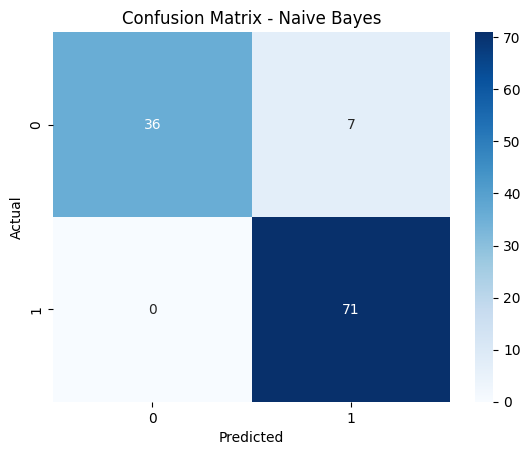

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Decision Tree Classifier:


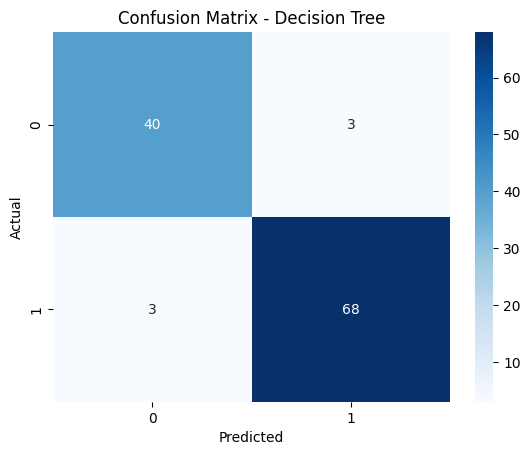

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Random Forest Classifier:


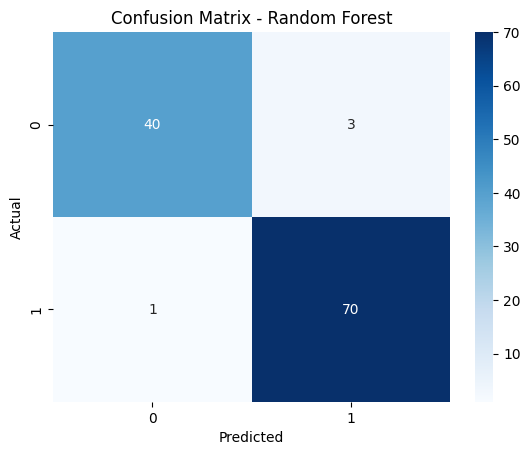

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Ensemble Learning:


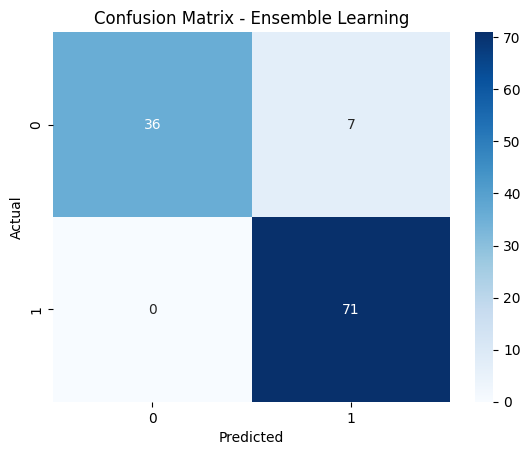

Classification Report - Ensemble Learning:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
# Confusion Matrix and Classification Report for Naive Bayes Classifier
print("Naive Bayes Classifier:")
cm_nb = confusion_matrix(y_test, naive_bayes_test_predictions_enriched)
sns.heatmap(cm_nb, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

print("Classification Report - Naive Bayes:")
print(classification_report(y_test, naive_bayes_test_predictions_enriched))

# Confusion Matrix and Classification Report for Decision Tree Classifier
print("Decision Tree Classifier:")
cm_dt = confusion_matrix(y_test, decision_tree_test_predictions_enriched)
sns.heatmap(cm_dt, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("Classification Report - Decision Tree:")
print(classification_report(y_test, decision_tree_test_predictions_enriched))

# Confusion Matrix and Classification Report for Random Forest Classifier
print("Random Forest Classifier:")
cm_rf = confusion_matrix(y_test, random_forest_test_predictions)
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print("Classification Report - Random Forest:")
print(classification_report(y_test, random_forest_test_predictions))

# Confusion Matrix and Classification Report for Ensemble Learning
print("Ensemble Learning:")
cm_ensemble = confusion_matrix(y_test, rounded_ensemble_test_predictions)
sns.heatmap(cm_ensemble, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ensemble Learning')
plt.show()

print("Classification Report - Ensemble Learning:")
print(classification_report(y_test, rounded_ensemble_test_predictions))

# **10-fold cross validation**

In [ ]:
# Combine Naive Bayes probabilities with the original features
naive_bayes_classifier = MultinomialNB()
naive_bayes_train_probabilities = naive_bayes_classifier.fit(X, y).predict_proba(X)
X_enriched_nb = np.hstack((X, naive_bayes_train_probabilities))

# Run Decision Tree Classifier on the enriched dataset
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_train_predictions = decision_tree_classifier.fit(X_enriched_nb, y).predict(X_enriched_nb)

# Run Random Forest Classifier on the enriched dataset
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_train_predictions = random_forest_classifier.fit(X_enriched_nb, y).predict(X_enriched_nb)

# Define weights for Naive Bayes and Random Forest predictions
weight_naive_bayes = 0.3
weight_random_forest = 0.7

# Combine predictions using weighted averaging
ensemble_train_predictions = (weight_naive_bayes * naive_bayes_train_probabilities.argmax(axis=1) +
                              weight_random_forest * random_forest_train_predictions)

# Round the continuous predictions to obtain discrete class labels
rounded_ensemble_train_predictions = np.round(ensemble_train_predictions).astype(int)

# Calculate accuracy for the ensemble model
accuracy_ensemble_train = accuracy_score(y, rounded_ensemble_train_predictions)
print("Ensemble Training Accuracy (10-fold cross-validation):", accuracy_ensemble_train)

# Perform 10-fold cross-validation for Naive Bayes
nb_cv_scores = cross_val_score(naive_bayes_classifier, X, y, cv=10, scoring='accuracy')
print("Naive Bayes Cross-Validation Mean Accuracy:", nb_cv_scores.mean())

# Perform 10-fold cross-validation for Decision Tree
dt_cv_scores = cross_val_score(decision_tree_classifier, X_enriched_nb, y, cv=10, scoring='accuracy')
print("Decision Tree Cross-Validation Mean Accuracy:", dt_cv_scores.mean())

# Perform 10-fold cross-validation for Random Forest
rf_cv_scores = cross_val_score(random_forest_classifier, X_enriched_nb, y, cv=10, scoring='accuracy')
print("Random Forest Cross-Validation Mean Accuracy:", rf_cv_scores.mean())

Ensemble Training Accuracy (10-fold cross-validation): 1.0
Naive Bayes Cross-Validation Mean Accuracy: 0.8927944862155389
Decision Tree Cross-Validation Mean Accuracy: 0.9192669172932331
Random Forest Cross-Validation Mean Accuracy: 0.968421052631579
